## K-Means

- **Q1** Se tiene que implementar un algoritmo K-Means siguiendo los pasos del pseudo código

In [9]:
# Añaden las librerias para el proyecto

import numpy as np


def kMeans(X, K, maxIters = 10, plot_progress = None):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

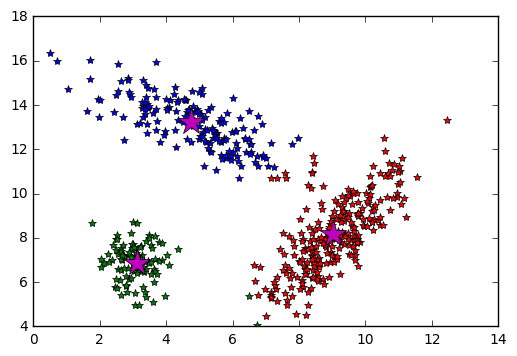

In [10]:
# Algoritmo kMeans


#Here is the pseudocode for the K-Means algorithm:
#1) Initialize the K cluster centers C # To initialize use random values¹ or, alternatively, K random points in the dataset.
#2) While Y changed during the last iteration do:
# Assign each point to the nearest centroid².
#3)     Y[i] = nearest_centroid(X[i], C)
# Recompute each centroid as the mean of the points assigned to it².
#4)     C = recompute_centroids(Y, X)
#5) Return C #Final stable centroids. 

import sys
import pylab as plt
import numpy as np
plt.ion()

def show(X, C, centroids, keep = False):
    import time
    time.sleep(0.5)
    plt.cla()
    plt.plot(X[C == 0, 0], X[C == 0, 1], '*b',
         X[C == 1, 0], X[C == 1, 1], '*r',
         X[C == 2, 0], X[C == 2, 1], '*g')
    plt.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
    plt.draw()
    if keep :
        plt.ioff()
        plt.show()

# generate 3 cluster data
# data = np.genfromtxt('data1.csv', delimiter=',')
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]
data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)
X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)


centroids, C = kMeans(X, K = 3, plot_progress = show)
show(X, C, centroids, True)
